## Analyze Inherent structures

This notebook is to get a grasp on analyzing the inherent structure trajectories.


### Import modules

In [1]:
# data analysis and wrangling
import numpy as np 
import pandas as pd
import random as rnd
from scipy import stats

#visualization
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.mosaicplot import mosaic


### Load data

In [2]:
fnameRidges='/home/marco/STRUCTURAL-GLASS/OUTPUT/T0.49/N65/S1/elistRidge.txt'
dataRidges=pd.read_csv(fnameRidges ,sep=' ')
nRidges=len(dataRidges)

### A first look at the data

In [3]:
#This is what the data looks like
print('Keys: ',dataRidges.columns.values)
dataRidges.head(5)
#dataRidges.describe()

Keys:  ['time' 'Eridge' 'Eante' 'Epost']


,time,Eridge,Eante,Epost
0,20.5,-401.252593,-401.398684,-401.856656
1,30.5,-401.748612,-401.856656,-401.889081
2,32.5,-401.643488,-401.889081,-401.734192
3,33.5,-401.384318,-401.734192,-401.878557
4,46.5,-401.549506,-401.878557,-402.197866


### Average values

In [4]:
#<Eridge> is sizably larger than the <Eis>
EanteMean=dataRidges['Eante'].mean()
EanteErr=dataRidges['Eante'].sem()
EanteVar=dataRidges['Eante'].var()

EridgeMean=dataRidges['Eridge'].mean()
EridgeErr=dataRidges['Eridge'].sem()
EridgeVar=dataRidges['Eridge'].var()

EpostMean=dataRidges['Epost'].mean()
EpostErr=dataRidges['Epost'].sem()
EpostVar=dataRidges['Epost'].var()

print('<Eante> = ',EanteMean,EanteErr)
print('<Eridge> = ',EridgeMean,EridgeErr)
print('<Epost> = ',EpostMean,EpostErr)
print('compatibility : ',
      np.abs(EridgeMean-EanteMean)/np.sqrt(EridgeErr**2+EanteErr**2),
     'standard errors')


<Eante> =  -401.414526236 0.00330800220457
<Eridge> =  -400.722172106 0.00476817449181
<Epost> =  -401.414220797 0.00330847195724
compatibility :  119.303388012 standard errors


## Energy distributions
Both the IS and the Ridge have a wide distribution, though the ridge is wider.

A criterion to say that $E_r$ is a threshold energy is that $P(E_r)$ is much narrower than $P(E_{IS})$, so it is clearly not the case. An indicator of the likeliness of threshold behavior is the ratio between the variances of the distributions

$\sigma_r^2/\sigma_{IS}^2$

which should be small in case of threshold behavior.

Ratio between variances is not small:  2.07765148875


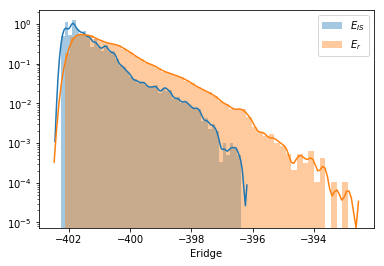

In [5]:
#I plot the distributions, which look vaguely exponential with the current data.
ax=sns.distplot(dataRidges['Eante'], hist_kws={'log':True, "label": "$E_{IS}$"})
ax=sns.distplot(dataRidges['Eridge'], hist_kws={'log':True, "label": "$E_{r}$"})
ax.legend()
print('Ratio between variances is not small: ',dataRidges['Eridge'].var()/dataRidges['Eante'].var())

### Check that inherent structures are symmetric around the barrier

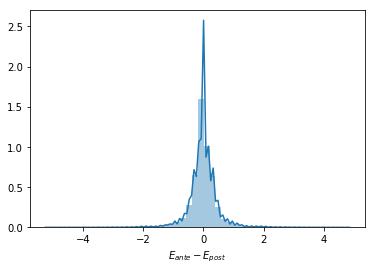

In [6]:
#Now we compare the two ISs around a barrier
sns.distplot(dataRidges['Eante']-dataRidges['Epost'], axlabel='$E_{ante}-E_{post}$')

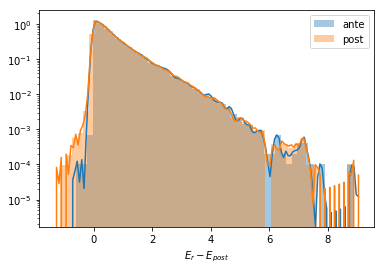

In [7]:
#Compare barrier with respect to following and previous IS
ax=sns.distplot(dataRidges['Eridge']-dataRidges['Eante'], axlabel='$E_{r}-E_{ante}$', hist_kws={'log':True, "label": "ante"})
ax=sns.distplot(dataRidges['Eridge']-dataRidges['Epost'], axlabel='$E_{r}-E_{post}$', hist_kws={'log':True, "label": "post"})
ax.legend()

### Distribution of barrier heights

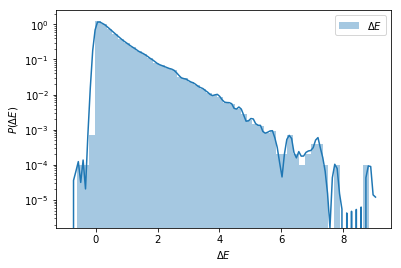

In [8]:
#Distribution of barrier heights
dataRidges['deltaE']=dataRidges['Eridge']-dataRidges['Eante']
ax=sns.distplot(dataRidges['deltaE'], hist_kws={'log':True, "label": "$\Delta E$"})
ax.set_ylabel('$P(\Delta E)$')
ax.set_xlabel('$\Delta E$')
ax.legend()

Compare the three distributions, by substracting their minimum value

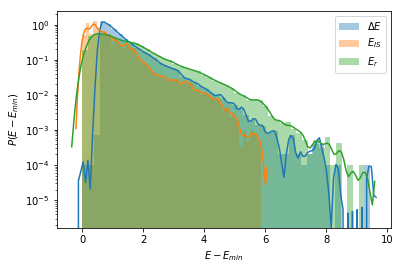

In [9]:
ax=sns.distplot(dataRidges['deltaE']-dataRidges['deltaE'].min(), hist_kws={'log':True, "label": "$\Delta E$"})
ax=sns.distplot(dataRidges['Eante']-dataRidges['Eante'].min(), hist_kws={'log':True, "label": "$E_{IS}$"})
ax=sns.distplot(dataRidges['Eridge']-dataRidges['Eridge'].min(), hist_kws={'log':True, "label": "$E_{r}$"})
ax.set_ylabel('$P(E-E_{min})$')
ax.set_xlabel('$E-E_{min}$')
ax.legend()


### Trapping times

The trapping time distribution has a lot of wholes, which essentially tells us that a much larger sampling is needed in order to say something properly. Tentatively, the largest time we measure accurately is ~300.

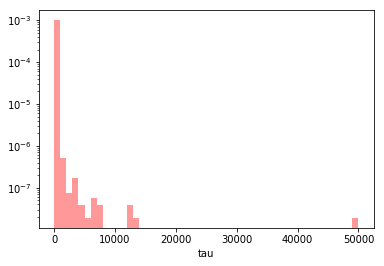

In [10]:
#Full data
dataRidges['tau']=dataRidges['time'].diff()
sns.distplot(dataRidges['tau'][1:],norm_hist=True, kde=False,hist_kws={'log':True, 'color':'red'})

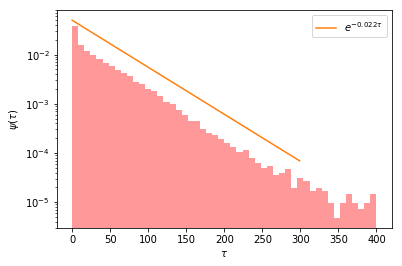

In [11]:
#Only decently sampled times (tau<400)
dataRidges['tau']=dataRidges['time'].diff()
dataRidges['tau'][0]=dataRidges['time'][0]
range=(0,400)
ax=sns.distplot(dataRidges['tau'][1:],norm_hist=True, kde=False,hist_kws={'log':True, 'color':'red', 'range':range})
#ax.set(xscale="log", yscale="log") #if we want to show that it is not a power law
x=np.arange(0,300,1)
y=np.exp(-3-0.022*x)
plt.plot(x,y,label='$e^{-0.022\\tau}$')
ax.set_ylabel('$\psi(\\tau)$')
ax.set_xlabel('$ \\tau $')
ax.legend()

### Correlations between subsequent inherent structures
Two subsequent inherent structures are strongly correlated

In [12]:
#Pearson coefficient between each energy and the following
corr=((dataRidges['Eante']-EanteMean)*(dataRidges['Epost']-EpostMean)).sum()/nRidges
den=np.sqrt(EanteVar*EpostVar)
print("rho(ante,post) = ",corr/den)

rho(ante,post) =  0.793333885473


### Correlation between IS and subsequent ridge

In [13]:
#Pearson coefficient between each IS and the following ridge
corr=((dataRidges['Eante']-EanteMean)*(dataRidges['Eridge']-EridgeMean)).sum()/nRidges
den=np.sqrt(EanteVar*EridgeVar)
print("rho(ante,ridge) = ",corr/den)

rho(ante,ridge) =  0.707758042758


### Correlation between ridge and subsequent IS

In [14]:
#Pearson coefficient between each ridge and the following IS
corr=((dataRidges['Epost']-EpostMean)*(dataRidges['Eridge']-EridgeMean)).sum()/nRidges
den=np.sqrt(EpostVar*EridgeVar)
print("rho(ridge,post) = ",corr/den)

rho(ridge,post) =  0.707426539652


### Correlations between subsequent ridges

In [15]:
ridgesAnte=np.array(dataRidges['Eridge'])[0:nRidges-1]
ridgesPost=np.array(dataRidges['Eridge'])[1:nRidges]

corr=((ridgesAnte-ridgesAnte.mean())*(ridgesPost-ridgesPost.mean())).sum()/nRidges
den=np.sqrt(ridgesAnte.var()*ridgesPost.var())
print("rho(ridgeAnte,ridgePost) = ",corr/den)
del ridgesAnte,ridgesPost

rho(ridgeAnte,ridgePost) =  0.728862058027


### Correlations between $\tau$ and $\Delta E$

In [16]:
#Pearson coefficient between tau and deltaE
tauMean=dataRidges['tau'].mean()
deltaEMean=dataRidges['deltaE'].mean()
corr=((dataRidges['tau']-tauMean)*(dataRidges['deltaE']-deltaEMean)).sum()/nRidges
den=np.sqrt(dataRidges['tau'].var()*dataRidges['deltaE'].var())
print("rho(tau,deltaE) = ",corr/den)

corr=((dataRidges['tau']-tauMean)*(dataRidges['Eridge']-EridgeMean)).sum()/nRidges
den=np.sqrt(dataRidges['tau'].var()*dataRidges['Eridge'].var())
print("rho(tau,Eridge) = ",corr/den)

corr=((dataRidges['tau']-tauMean)*(dataRidges['Eante']-EanteMean)).sum()/nRidges
den=np.sqrt(dataRidges['tau'].var()*dataRidges['Eante'].var())
print("rho(tau,Eante) = ",corr/den)

corr=((dataRidges['tau']-tauMean)*(dataRidges['Epost']-EpostMean)).sum()/nRidges
den=np.sqrt(dataRidges['tau'].var()*dataRidges['Epost'].var())
print("rho(tau,Epost) = ",corr/den)

rho(tau,deltaE) =  0.0002598316892
rho(tau,Eridge) =  -0.0213638658457
rho(tau,Eante) =  -0.0310586366476
rho(tau,Epost) =  -0.0225286302408
